# Deepen/raise profiles de bodem van D-hydro profielen 

Deze notebook runt het .py bestand dat in de scripts map staat. Dit .py bestand wordt geimporteerd met de aanname dat het script in één folder hoger zit dan de huidige notebook. Als het script niet werkt, check dan eerst of dit klopt.

Dit script heeft zes inputs nodig:
* `mdu_path`:  
                Path to mdu file containing the D-hydro model structure
* `shape_path`: 
                Path to shape file with polygons describing in which areas to adjust the cross section. The
               user can define multiple polygons within the shapefile and these can have different setting.
* `column_horizontal`:  
                Horizontal width (always in meters) over which the cross section bottom is adjusted. The
                horizontal width/section is always placed in the deepest part of (current) cross section.
                The tool identifies the lowest point of the profile and than looks to the left
                and right to find the lowest section (with the defined width)
* `column_vertical`: 
                column name in the shapefile that gives the dimensions with which the cross sections should be
                deepened/raised. column should contain float numbers.
                if type_column_vertical = 'distance'/'uniform', the unit is in meters.
                if type_column_vertical = 'referencelevel', the unit is a reference height with a vertical datum.
* `vertical_distance_type`:  
                The cross section can be adjusted vertically using three options. All options can be used to
                raise or lower the profile.
                - 'distance' --> indicates that the bottom of the profile for the user-defined width is flattened
                and moved to a certain level. This level is computed by adding up the bottom level of the profile plus
                the vertical displacement. Positive number is increasing the bottom level, negative number is
                lowering the bottom level. E.g. if the column_vertical contains the number -0.5 and the lowest point
                is currently +5 m NAP, the bottom of the cross section is flattened (width is user defined) and lies
                at +4.5 m NAP
                - 'referencelevel' --> indicates that the bottom of the profile for the user-defined width is flattened
                and moved to a certain reference height that is defined with a vertical datum. In the Netherlands,
                we use meters in Amsterdam Ordnance Datum or Normaal Amsterdams Peil (NAP). E.g. if the column_vertical
                contains the number 4, the bottom of the cross section is flattened (width is user defined) and lies
                at +4 m NAP. In this way, the bottom of the profile can lowered/raised. This can also vary within
                the width-section that is selected. Maybe a part of the section is raised, and another part is lowered.
                - 'uniform' --> indicates that the bottom is uniformly/evenly lowered/raised with a certain distance
                The existing variations/irregularities persist.
* `output_path`:  
                Path where the crsdef.ini and crsloc.ini files are saved as output

Opmerkingen:
- Hydrolib dient in python geïnstalleerd te zijn (open prompt, pip install hydrolib-core)

In de onderstaande afbeeldingen zie je de toepassing van parameter 'vertical_distance_type'

# Huidige situatie

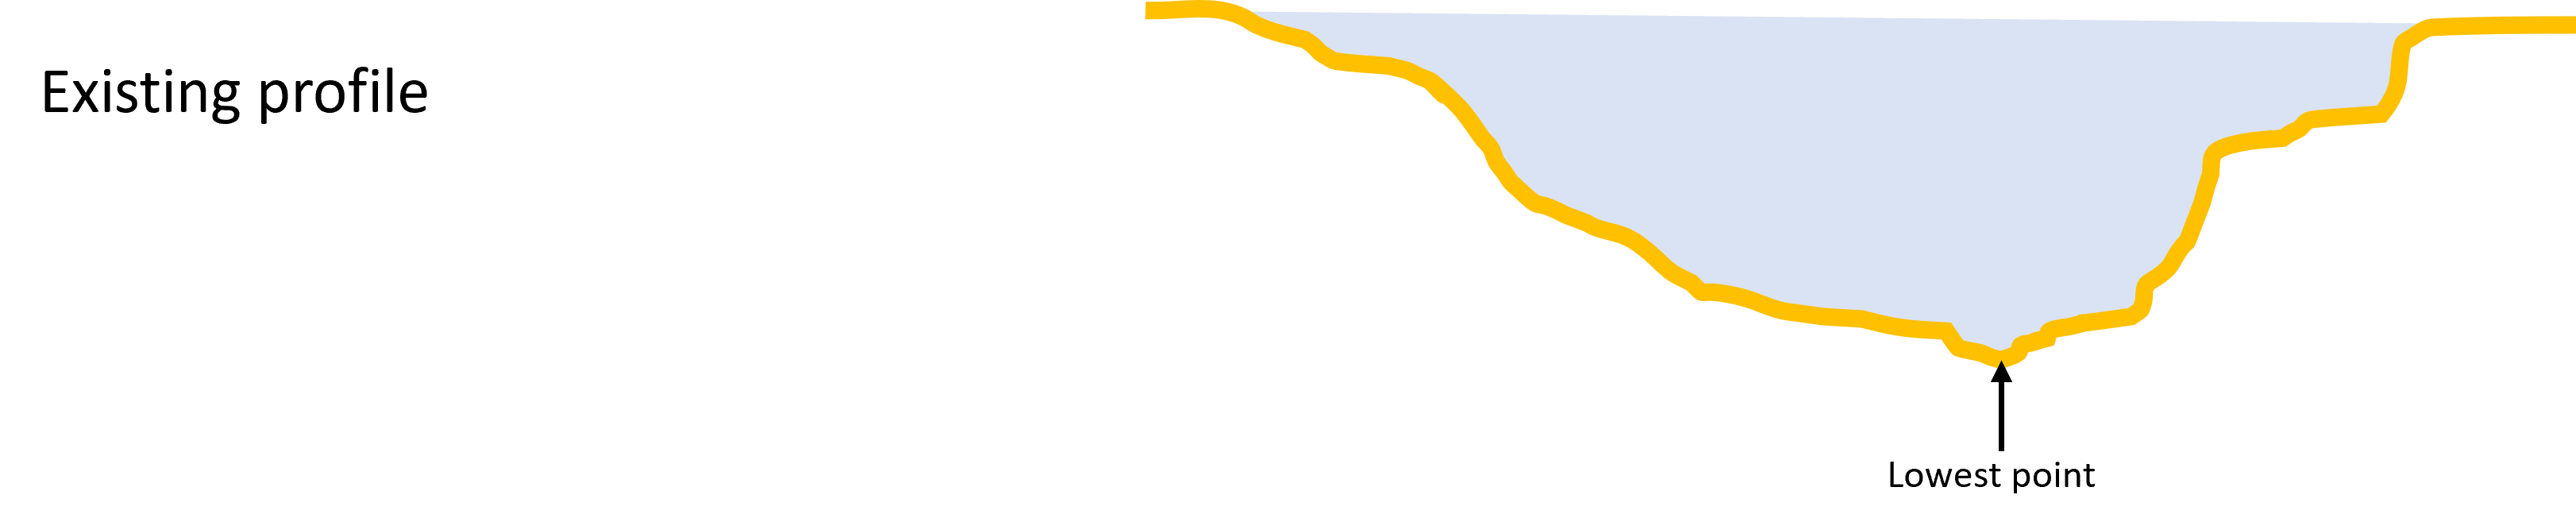

# vertical_distance_type = 'distance'

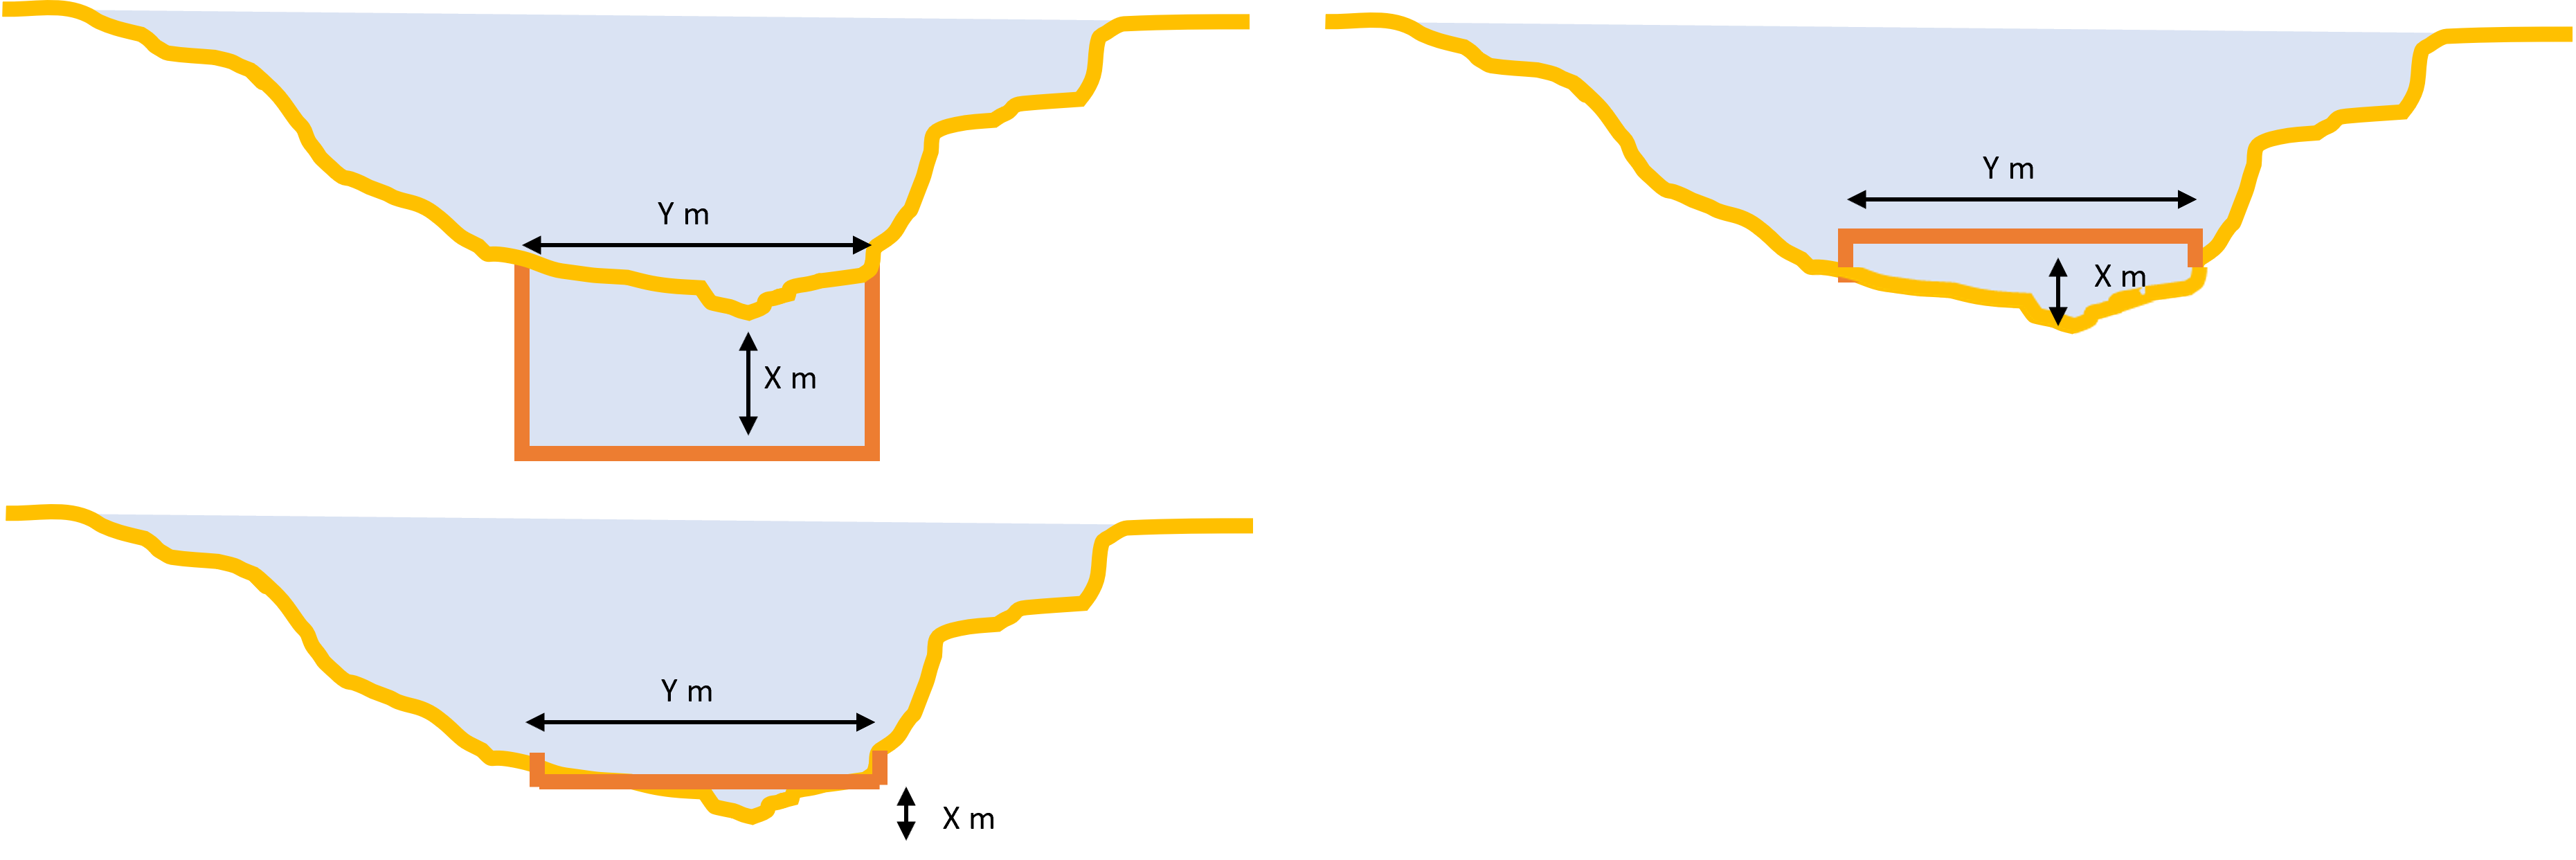

# vertical_distance_type = 'referencelevel'

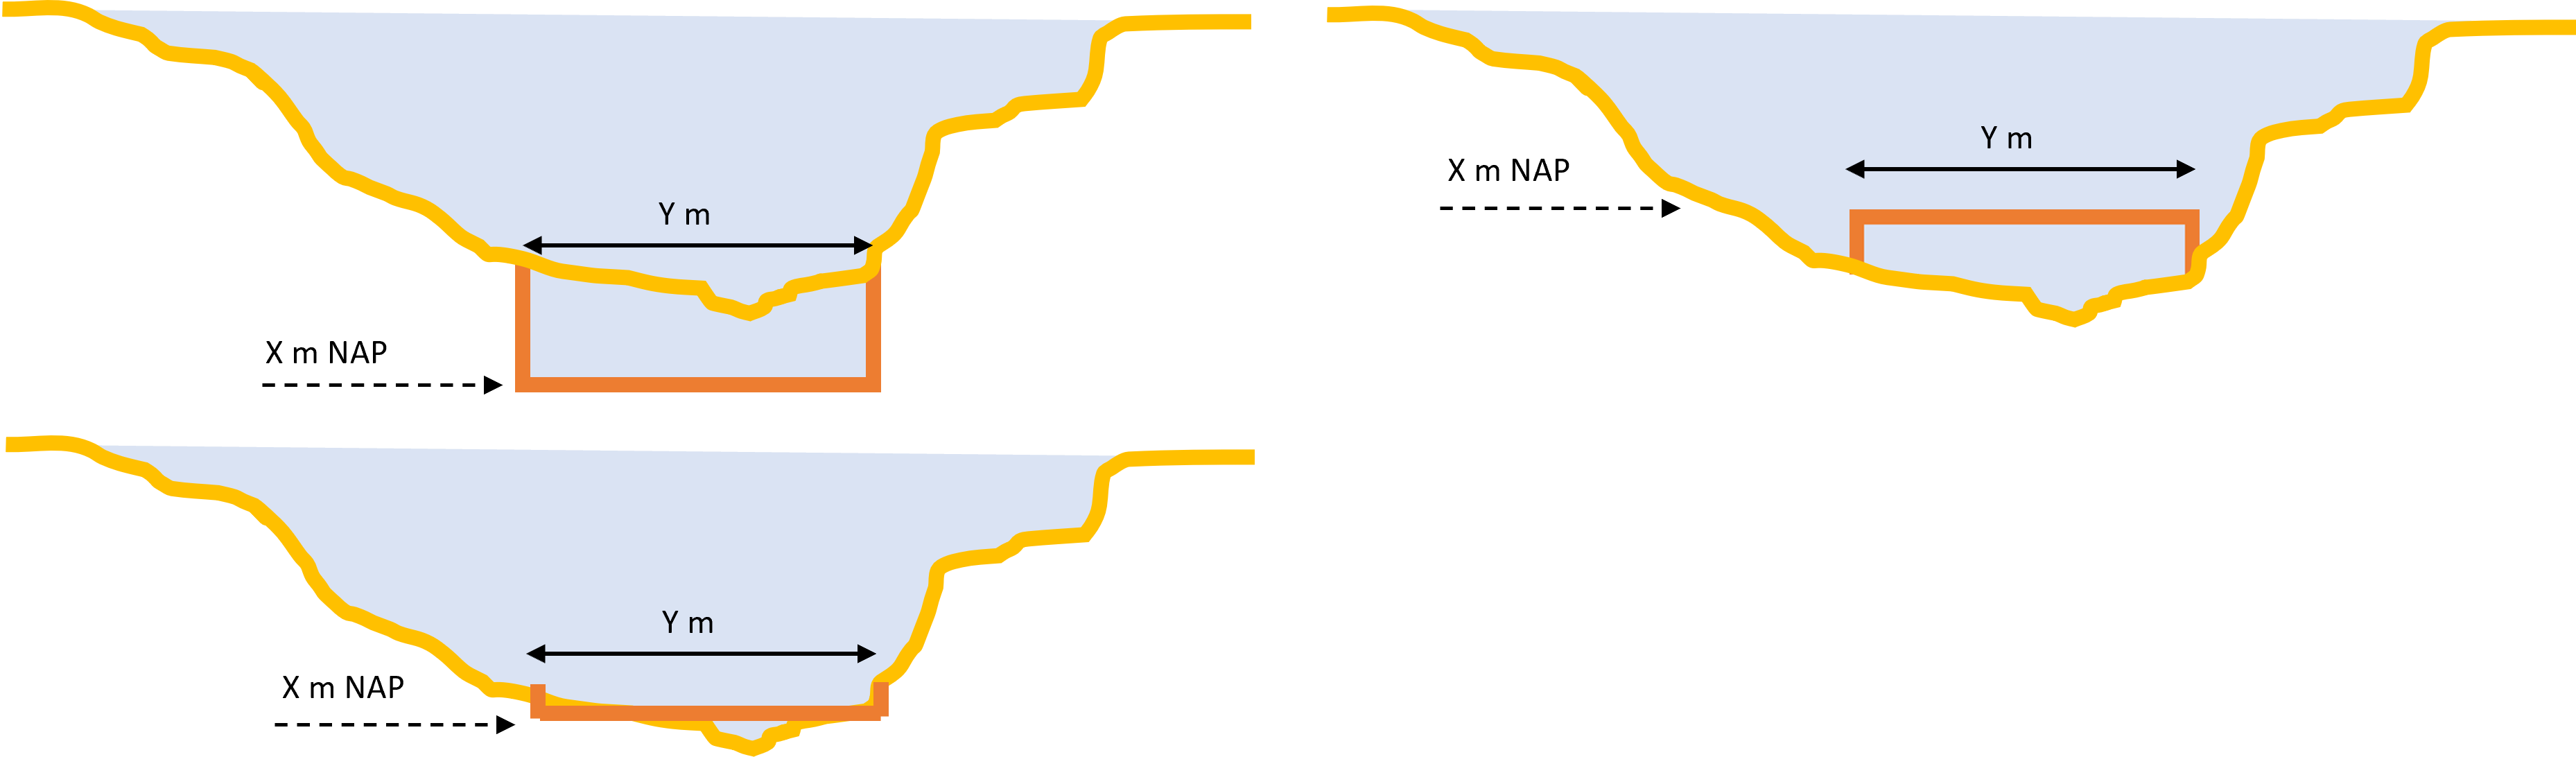

# vertical_distance_type = 'uniform'

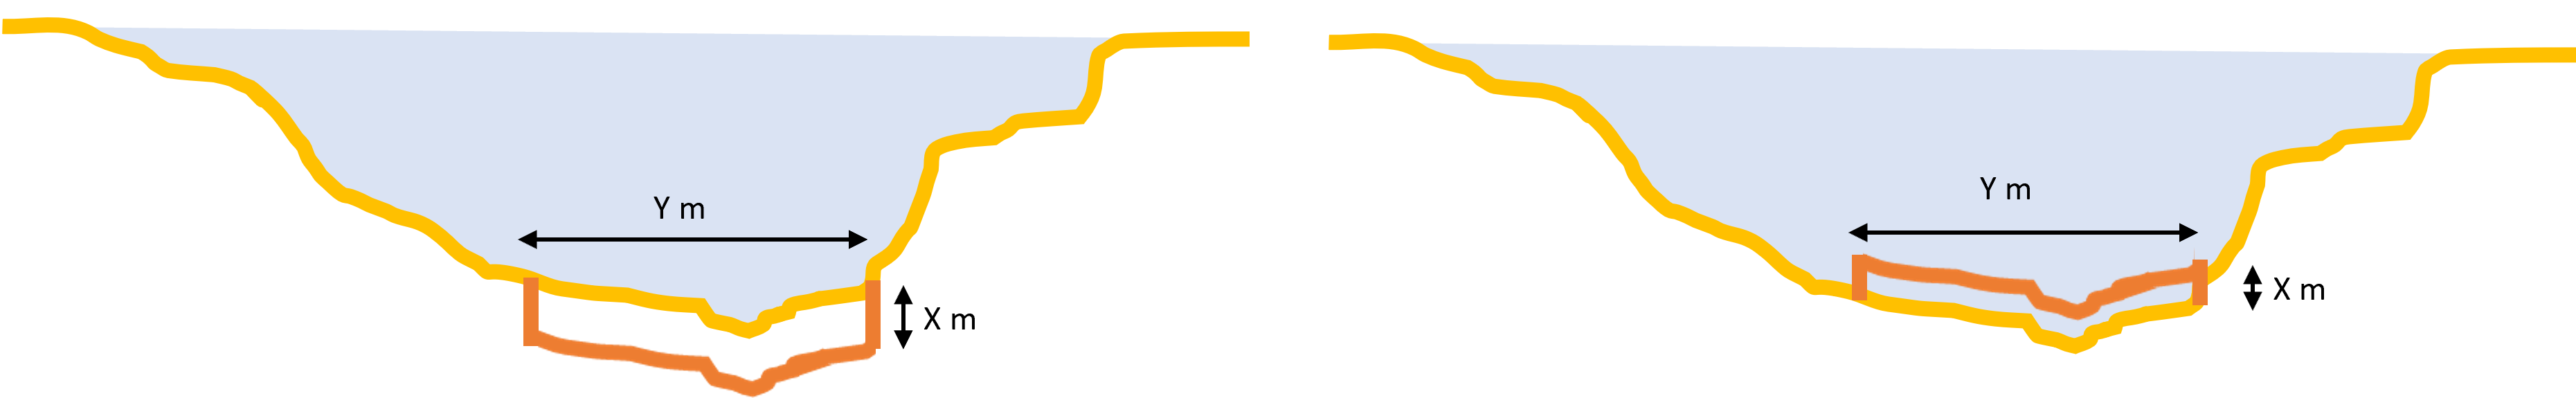

## Importeer het benodigde script: Run onderstaande cel

In [1]:
import os 
import sys
from pathlib import Path
currentdir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0,currentdir) 

from change_depth_crosssections import change_depth_crosssection

## Definieer de inputs: Pas deze hieronder aan en run de cel

In [2]:
mdu_path = Path(os.path.join(currentdir, r"exampledata/Dellen","Model_cleaned/dflowfm/Flow1D.mdu"))
shape_path = Path(os.path.join(currentdir, r"exampledata/Dellen/GIS/Peilgebied_Dellen.shp"))

column_vertical = "bdm_NAP"
vertical_vertical_distance_type = "distance"
column_horizontal = "bdm_brd"
output_path = os.path.join(currentdir, r"notebooks/output")
if not os.path.isdir(output_path):
    os.makedirs(output_path)

## Run het script

In [3]:
change_depth_crosssection(
    mdu_path,
    shape_path,
    column_horizontal,
    column_vertical,
    vertical_vertical_distance_type,
    output_path,
);

Amersfoort aangenomen als projectie
no 1d2d links in model
Aangenomen dat alle lijnen watergangen zijn, branches.gui is leeg.
Amersfoort aangenomen als projectie
Did not have to split shared definitions for the selected profile loctions
Starting to adjust 247 profile definitions
Cannot adjust profile definition PPROUP_OAF-O-00216_up at location OAF-O-00216_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-00216_down at location OAF-O-00216_1.0 because it is not a yz-profile
Cannot adjust profile definition PPROUP_OAF-O-02381_up at location OAF-O-02381_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-02381_down at location OAF-O-02381_2.4 because it is not a yz-profile
Cannot adjust profile definition PPROUP_OAF-O-00213_up at location OAF-O-00213_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-00213_down at location OAF-O-00213_2.4 because it is not a yz-profile
Cannot adjust profile definiti

Cannot adjust profile definition PPROUP_OAF-O-01042_up at location OAF-O-01042_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-01042_down at location OAF-O-01042_142.1 because it is not a yz-profile
Cannot adjust profile definition PPROUP_OAF-O-00217_up at location OAF-O-00217_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-00217_down at location OAF-O-00217_355.7 because it is not a yz-profile
Cannot adjust profile definition PPROUP_OAF-O-00155_up at location OAF-O-00155_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-00155_down at location OAF-O-00155_446.3 because it is not a yz-profile
Cannot adjust profile definition PPROUP_OAF-O-00161_up at location OAF-O-00161_0.1 because it is not a yz-profile
Cannot adjust profile definition PPRODN_OAF-O-00161_down at location OAF-O-00161_840.7 because it is not a yz-profile
Cannot adjust profile definition PPROUP_OAF-O-00159_up at location OAF-O

# Output
In the output folder ("notebooks/output") the output of this script can be found. The output of this script are two .ini files:
* crsdef.ini
* crsloc.ini

Both of these files can be pasted into the original Dellen model, make sure to first copy the original model before editing or overwriting.